In [8]:
import pandas as pd
from modelFunc import run_model
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do MIT-BIH
mitbih_train = pd.read_csv('DataBase/mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('DataBase/mitbih_test.csv', header=None)

# Combinar os dados de treino e teste
mitbih_data = pd.concat([mitbih_train, mitbih_test], axis=0)

# Exibir as primeiras linhas da base de dados
print(mitbih_data.head())

# Verificar a distribuição das classes
print(mitbih_data.iloc[:, -1].value_counts())



        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Função para pré-processamento
def preprocess_data(data):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)


X_train_mitbih, X_test_mitbih, y_train_mitbih, y_test_mitbih = preprocess_data(mitbih_data)


In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
dt = DecisionTreeClassifier(max_depth=5)

# Rodar modelos para MIT-BIH
mlp_precision_mitbih, mlp_recall_mitbih, mlp_f1_mitbih = run_model(mlp, X_train_mitbih, X_test_mitbih, y_train_mitbih, y_test_mitbih)
dt_precision_mitbih, dt_recall_mitbih, dt_f1_mitbih = run_model(dt, X_train_mitbih, X_test_mitbih, y_train_mitbih, y_test_mitbih)


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: Unde

In [12]:
from pickleResults import save_results


# Salvar MLP e seus resultados para MIT-BIH
save_results(mlp, {'precision': mlp_precision_mitbih, 'recall': mlp_recall_mitbih, 'f1': mlp_f1_mitbih}, 'mlp_model_mitbih.pkl', 'mlp_results_mitbih.pkl')
# Salvar DT e seus resultados para MIT-BIH
save_results(dt, {'precision': dt_precision_mitbih, 'recall': dt_recall_mitbih, 'f1': dt_f1_mitbih}, 'dt_model_mitbih.pkl', 'dt_results_mitbih.pkl')

In [ ]:
from pickleResults import load_results


# Carregar MLP e seus resultados para MIT-BIH
mlp_model_mitbih, mlp_results_mitbih = load_results('mlp_model_mitbih.pkl', 'mlp_results_mitbih.pkl')
# Carregar DT e seus resultados para MIT-BIH
dt_model_mitbih, dt_results_mitbih = load_results('dt_model_mitbih.pkl', 'dt_results_mitbih.pkl')

## Resultados 

In [21]:



results_mitbih = pd.DataFrame({
    'MLP Precision': mlp_precision_mitbih,
    'MLP Recall': mlp_recall_mitbih,
    'MLP F1': mlp_f1_mitbih,
    'DT Precision': dt_precision_mitbih,
    'DT Recall': dt_recall_mitbih,
    'DT F1': dt_f1_mitbih
})


dt_results = pd.DataFrame({
    'DT Precision': dt_precision_mitbih,
    'DT Recall': dt_recall_mitbih,
    'DT F1': dt_f1_mitbih

})

mlp_results = pd.DataFrame({
    'MLP Precision': mlp_precision_mitbih,
    'MLP Recall': mlp_recall_mitbih,
    'MLP F1': mlp_f1_mitbih
})




means_mitbih = results_mitbih.mean()
stds_mitbih = results_mitbih.std()


print('Means MIT-BIH:\n \n', means_mitbih)
print('\n')
print('Standard Deviations MIT-BIH:\n \n', stds_mitbih)


Means MIT-BIH:
 
 MLP Precision    0.907041
MLP Recall       0.876856
MLP F1           0.890687
DT Precision     0.643462
DT Recall        0.586214
DT F1            0.611904
dtype: float64


Standard Deviations MIT-BIH:
 
 MLP Precision    0.013754
MLP Recall       0.008413
MLP F1           0.005359
DT Precision     0.000104
DT Recall        0.000094
DT F1            0.000095
dtype: float64


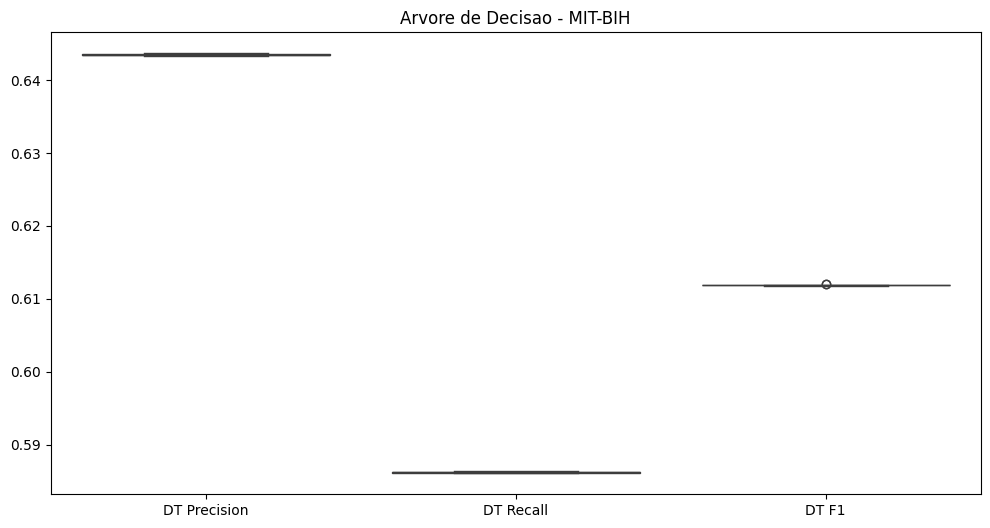

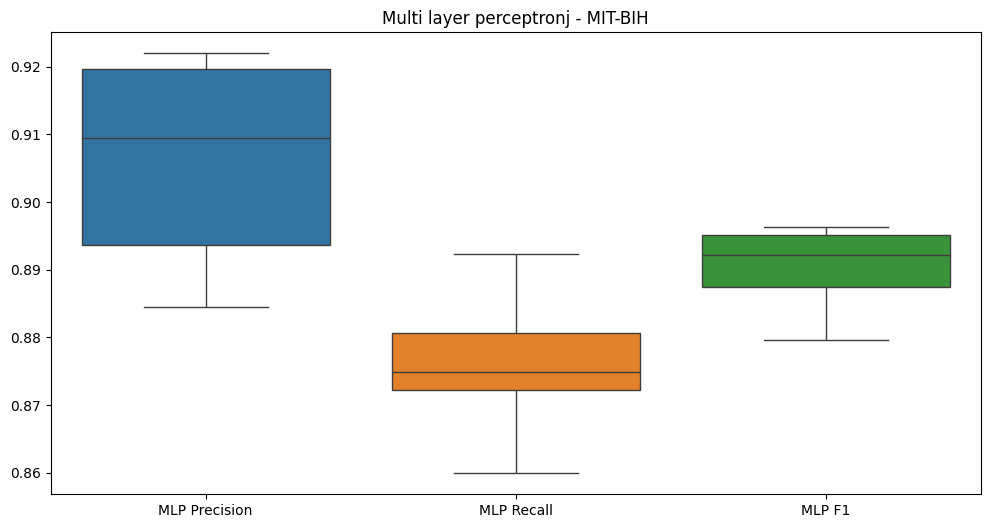

In [18]:
# Boxplot MIT-BIH
plt.figure(figsize=(12, 6))
sns.boxplot(data=dt_results)
plt.title('Arvore de Decisao - MIT-BIH')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=mlp_results)
plt.title('Multi layer perceptronj - MIT-BIH')
plt.show()

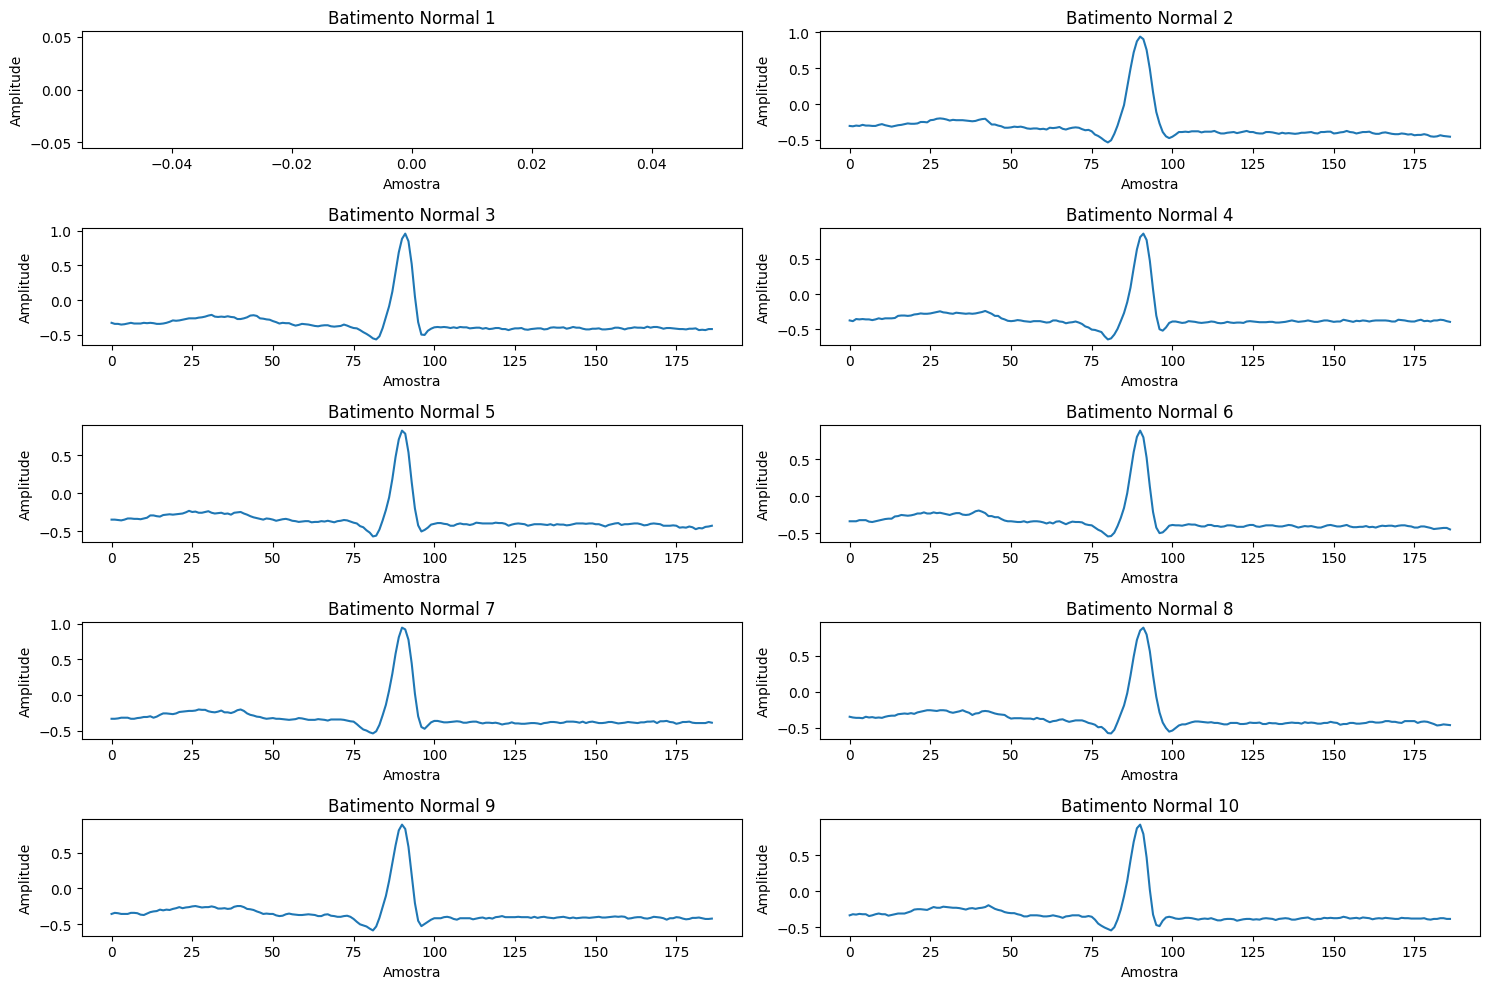

In [48]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt


record_path = 'ecg_view/100'  

record = wfdb.rdrecord(record_path)
annotation = wfdb.rdann(record_path, 'atr')


signals = record.p_signal
ann_sample = annotation.sample
ann_symbol = annotation.symbol


normal_beats = ann_sample[np.where(np.array(ann_symbol) == 'N')]


plt.figure(figsize=(15, 10))
for i in range(10):
    start = normal_beats[i] - 90 
    end = normal_beats[i] + 97  
    plt.subplot(5, 2, i + 1)
    plt.plot(signals[start:end, 0])  # Considerando o primeiro canal do sinal de ECG
    plt.title(f'Batimento Normal {i + 1}')
    plt.xlabel('Amostra')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()